## Importing libs

In [1]:
# create fake datasets
from sklearn.datasets import make_moons

# ML lib for GNG model
from neupy.algorithms import GrowingNeuralGas

# Plot libs
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image
%matplotlib inline

/home/rafaelpereira/anaconda3/envs/neupy/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rafaelpereira/anaconda3/envs/neupy/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rafaelpereira/anaconda3/envs/neupy/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rafaelpereira/anaconda

## GNG Model Build

In [2]:
def build_gng_model(max_edge_age, max_nodes, n_iter_before_neuron_added):
    return GrowingNeuralGas(
        n_inputs=2,
        n_start_nodes=2,
        shuffle_data=True,
        verbose=False,
        step=0.1,
        neighbour_step=0.001,

        max_edge_age=max_edge_age,
        max_nodes=max_nodes,
        n_iter_before_neuron_added=n_iter_before_neuron_added,

        after_split_error_decay_rate=0.5,
        error_decay_rate=0.995,
        min_distance_for_update=0.2,
    )

## Animated Training Method
from: https://github.com/itdxer/neupy/blob/master/notebooks/growing-neural-gas/Growing%20Neural%20Gas%20animated.ipynb

In [3]:
def animate_training(i, data, model):
    for line in animate_training.prev_lines:
        line.remove()
        
    # Training will slow down overtime and we increase number
    # of data samples for training
    n = int(0.5 * model.n_iter_before_neuron_added * (1 + i // 100))
    
    sampled_data_ids = np.random.choice(len(data), n)
    sampled_data = data[sampled_data_ids, :]
    model.train(sampled_data, epochs=1)
    
    lines = []
    for node_1, node_2 in model.graph.edges:
        weights = np.concatenate([node_1.weight, node_2.weight])
        line, = plt.plot(*weights.T, color='black')

        plt.setp(line, linewidth=1, color='black')
        
        lines.append(line)
        lines.append(plt.scatter(*weights.T, color='black', s=10))
    
    animate_training.prev_lines = lines
    return lines

## Moons Dataset

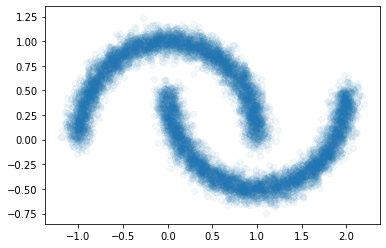

In [4]:
moons_dataset, _ = make_moons(10000, noise=0.07, random_state=0)
plt.scatter(*moons_dataset.T, alpha=0.05)

# Tests

### Default params

/home/rafaelpereira/anaconda3/envs/neupy/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


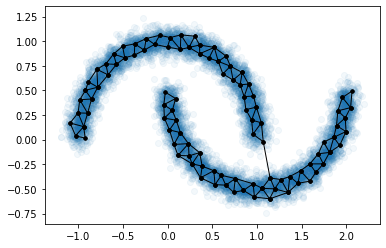

In [5]:
# Model build
model1 = build_gng_model(max_edge_age=50, max_nodes=100, n_iter_before_neuron_added=100)

# plotting dataset
fig = plt.figure()
plt.scatter(*moons_dataset.T, alpha=0.05)

# training
animate_training.prev_lines = []
training_animation = animation.FuncAnimation(fig, animate_training, fargs=(moons_dataset, model1,), frames=tqdm(np.arange(400)), interval=30, blit=True)

# plotting training animation gif
training_animation.save('gifs/moons_test1.gif', writer='imagemagick', fps=30)
Image(url='gifs/moons_test1.gif')

### Test: More nodes and less neuron adding time

/home/rafaelpereira/anaconda3/envs/neupy/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


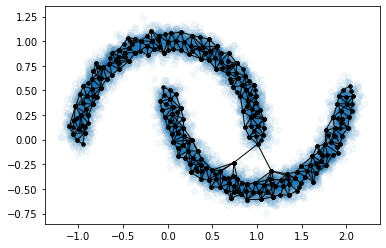

In [6]:
# Model build
model2 = build_gng_model(max_edge_age=50, max_nodes=300, n_iter_before_neuron_added=25)

# plotting dataset
fig = plt.figure()
plt.scatter(*moons_dataset.T, alpha=0.05)

# training
animate_training.prev_lines = []
training_animation = animation.FuncAnimation(fig, animate_training, fargs=(moons_dataset, model2,), frames=tqdm(np.arange(400)), interval=30, blit=True)

# plotting training animation gif
training_animation.save('gifs/moons_test2.gif', writer='imagemagick', fps=30)
Image(url='gifs/moons_test2.gif')

### Test: Short edge time

/home/rafaelpereira/anaconda3/envs/neupy/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


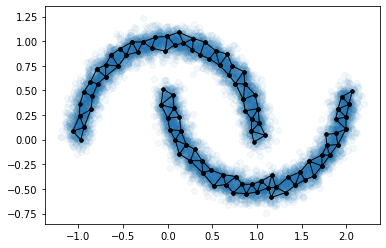

In [7]:
# Model build
model3 = build_gng_model(max_edge_age=10, max_nodes=100, n_iter_before_neuron_added=100)

# plotting dataset
fig = plt.figure()
plt.scatter(*moons_dataset.T, alpha=0.05)

# training
animate_training.prev_lines = []
training_animation = animation.FuncAnimation(fig, animate_training, fargs=(moons_dataset, model3,), frames=tqdm(np.arange(400)), interval=30, blit=True)

# plotting training animation gif
training_animation.save('gifs/moons_test3.gif', writer='imagemagick', fps=30)
Image(url='gifs/moons_test3.gif')

### Test: More neurons e siglhty less edge time and neuron time

/home/rafaelpereira/anaconda3/envs/neupy/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


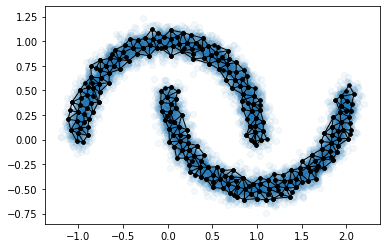

In [8]:
# Model build
model4 = build_gng_model(max_edge_age=25, max_nodes=300, n_iter_before_neuron_added=50)

# plotting dataset
fig = plt.figure()
plt.scatter(*moons_dataset.T, alpha=0.05)

# training
animate_training.prev_lines = []
training_animation = animation.FuncAnimation(fig, animate_training, fargs=(moons_dataset, model4,), frames=tqdm(np.arange(400)), interval=30, blit=True)

# plotting training animation gif
training_animation.save('gifs/moons_test4.gif', writer='imagemagick', fps=30)
Image(url='gifs/moons_test4.gif')